In [21]:
from sim.system_models.vehicle_systems.tire_model import TireModel
from sim.model_parameters.cars.lady_luck import LadyLuck

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
tire_model = TireModel()
lady_luck = LadyLuck()
tire_model.lat_coeffs = lady_luck.rear_tire_coeff_Fy
tire_model.long_coeffs = lady_luck.rear_tire_coeff_Fx

slip_ratios = np.linspace(-0.25, 0.25, 31)
slip_angles = np.linspace(-1 * np.pi / 12, np.pi / 12, 31)
normal_loads = np.array([500])
colors = np.array(["r", "g", "b"])

SR_dict = dict()
SA_dict = dict()

for slip_ratio in slip_ratios:
    SR_dict[slip_ratio] = []

for slip_angle in slip_angles:
    SA_dict[slip_angle] = []

In [23]:
inclination_angle = 0

outputs = []
for load in normal_loads:
    for slip_angle in slip_angles:
        for slip_ratio in slip_ratios:
            comstock_output = tire_model._get_comstock_forces(SR = slip_ratio, SA = slip_angle, FZ = load, IA = inclination_angle)
            SR_dict[slip_ratio].append([comstock_output[0], comstock_output[1]])
            SA_dict[slip_angle].append([comstock_output[0], comstock_output[1]])

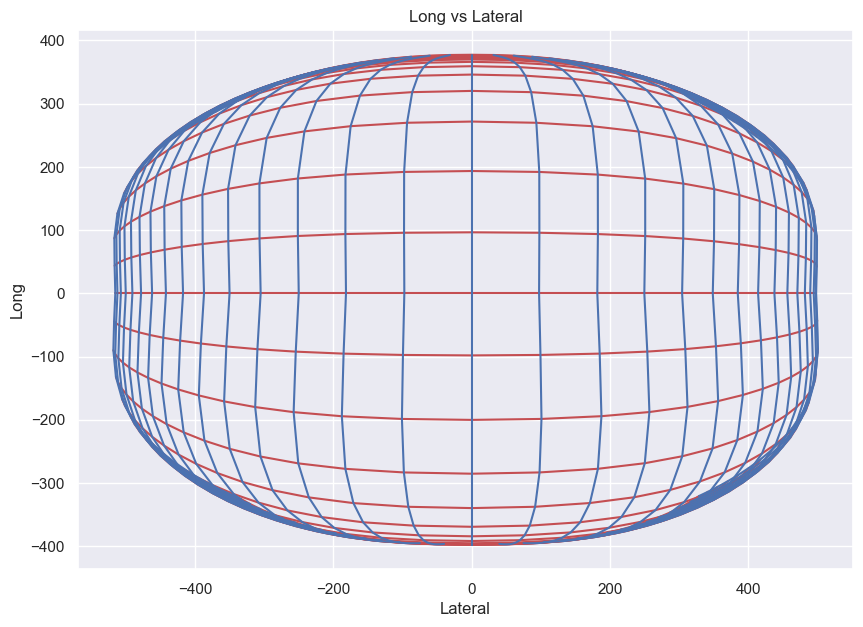

In [24]:
sns.set_theme(style="darkgrid", palette='deep')
sns.set(rc = {'figure.figsize':(10,7)})

for slip_ratio in SR_dict:
    forces = [[], []]
    slip = slip_ratio
    for force in SR_dict[slip_ratio]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'r')
    
for slip_angle in SA_dict:
    forces = [[], []]
    slip = slip_angle
    for force in SA_dict[slip_angle]:
        forces[0].append(force[0])
        forces[1].append(force[1])
    
    plt.plot(forces[1], forces[0], 'b')
    
plt.xlabel("Lateral")
plt.ylabel("Long")
plt.title("Long vs Lateral")
plt.show()